In [6]:
import pandas as pd
import numpy as np
import xarray
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data_path_1 = "/home/papalio/test_research/python_edu/class0/example_0913/"
data_path_2 = "/home/papalio/test_research/python_edu/class0/example_0914/"



Exercise 8-1. 주어진 위도(SSP_LAT.bin), 경도(SSP_LON.bin), 지형고도(SSP_Orography.bin) 자료를 읽고DataArray로 변환한 후, Dataset으로 합쳐 NetCDF(.nc) 형식으로 저장해보세요(ny=601, nx=751 / 원래자료는 ny*nx의 2차원 자료).


In [7]:
file_LAT ='SSP_LAT.bin' #위도
file_LON='SSP_LON.bin' #경도
file_Orgraphy = 'SSP_Orography.bin' #지형고도

ny = 601
nx = 751

lon = np.fromfile(data_path_1+file_LAT).reshape(ny,nx)
lat = np.fromfile(data_path_1+file_LON).reshape(ny,nx)
orog = np.fromfile(data_path_1+file_Orgraphy).reshape(ny,nx)

dims = ['ny','nx']
coords = [np.arange(ny), np.arange(nx)]

lon_da = xarray.DataArray(lon, dims=dims, coords=coords, name='LON')
lat_da = xarray.DataArray(lat, dims=dims, coords=coords, name='LAT')
orog_da = xarray.DataArray(orog, dims=dims, coords=coords, name='orog')

ds = xarray.merge([lon_da, lat_da, orog_da])
ds.to_netcdf('./exercise_8_1_output_lyj.nc')

In [8]:
# 생성한 nc 파일 확인
ds

<xarray.Dataset> Size: 11MB
Dimensions:  (ny: 601, nx: 751)
Coordinates:
  * ny       (ny) int64 5kB 0 1 2 3 4 5 6 7 ... 593 594 595 596 597 598 599 600
  * nx       (nx) int64 6kB 0 1 2 3 4 5 6 7 ... 743 744 745 746 747 748 749 750
Data variables:
    LON      (ny, nx) float64 4MB 33.0 33.0 33.0 33.0 ... 39.0 39.0 39.0 39.0
    LAT      (ny, nx) float64 4MB 124.5 124.5 124.5 124.5 ... 132.0 132.0 132.0
    orog     (ny, nx) float64 4MB nan nan nan nan nan ... nan nan nan nan nan

In [10]:
# nc 데이터 읽는법
file = 'exercise_8_1_output_lyj.nc'
test_path = '/home/papalio/test_research/python_edu_LYJ/'
ds = xarray.open_dataset(test_path+file)

ds

<xarray.Dataset> Size: 11MB
Dimensions:  (ny: 601, nx: 751)
Coordinates:
  * ny       (ny) int64 5kB 0 1 2 3 4 5 6 7 ... 593 594 595 596 597 598 599 600
  * nx       (nx) int64 6kB 0 1 2 3 4 5 6 7 ... 743 744 745 746 747 748 749 750
Data variables:
    LON      (ny, nx) float64 4MB ...
    LAT      (ny, nx) float64 4MB ...
    orog     (ny, nx) float64 4MB ...

In [13]:
import xarray as xr
import matplotlib.pyplot as plt

# 데이터 읽기
file = 'exercise_8_1_output_lyj.nc'
test_path = '/home/papalio/test_research/python_edu_LYJ/'
img_path = '/home/papalio/test_research/python_edu_LYJ/img/'  # 이미지 저장 경로
ds = xr.open_dataset(test_path + file)



# 지형고도 (orog) 시각화 및 저장
plt.figure(figsize=(8, 6))
plt.pcolormesh(ds['orog'], cmap='terrain')
plt.colorbar(label='Orography (Height)')
plt.title('Orography')
plt.xlabel('nx')
plt.ylabel('ny')
plt.savefig(img_path + 'orography_plot.png', dpi=300, bbox_inches='tight')  # 저장
plt.close()


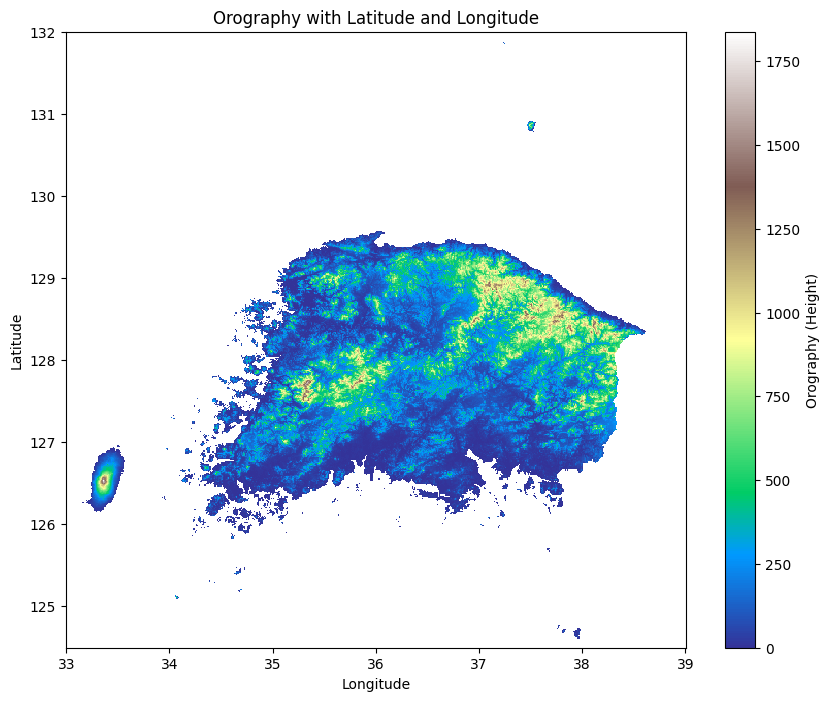

In [14]:
import xarray as xr
import matplotlib.pyplot as plt

# 데이터 읽기
file = 'exercise_8_1_output_lyj.nc'
test_path = '/home/papalio/test_research/python_edu_LYJ/'
img_path = '/home/papalio/test_research/python_edu_LYJ/img/'  # 이미지 저장 경로
ds = xr.open_dataset(test_path + file)

# 위도와 경도를 배경으로 지형고도 시각화
plt.figure(figsize=(10, 8))
plt.pcolormesh(ds['LON'], ds['LAT'], ds['orog'], cmap='terrain', shading='auto')
plt.colorbar(label='Orography (Height)')
plt.title('Orography with Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig(img_path + 'orography_with_lat_lon.png', dpi=300, bbox_inches='tight')  # 저장
plt.show()


In [ ]:
# Exercise 8-2. 주어진 NetCDF 자료(AR6_SSP585_5ENSMN_skorea_TA_gridraw_daily_2100.nc)를 읽고, 
# 모든경도와 위도에 대해 평균한 시계열 자료를 그래프로 그려보세요. 
data_path_1 = "/home/papalio/test_research/python_edu/class0/example_0913/"
data_nc = "AR6_SSP585_5ENSMN_skorea_TA_gridraw_daily_2100.nc"

ds = xarray.open_dataset(data_path_1+data_nc)